# **Connecting with the Kaggel API to import the data direclty to IPython Runtime.**

In [0]:
!pip install kaggle

In [0]:
from google.colab import files
files.upload()

{}

In [0]:
!ls -lha kaggle.json

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

# Downloading the data

In [0]:
!kaggle competitions download -c msk-redefining-cancer-treatment

  0% 0.00/24.2k [00:00<?, ?B/s]
100% 24.2k/24.2k [00:00<00:00, 14.8MB/s]
  0% 0.00/47.5k [00:00<?, ?B/s]
100% 47.5k/47.5k [00:00<00:00, 39.6MB/s]
 94% 57.0M/61.0M [00:00<00:00, 68.4MB/s]
100% 61.0M/61.0M [00:00<00:00, 104MB/s] 
 90% 89.0M/99.0M [00:00<00:00, 112MB/s]
100% 99.0M/99.0M [00:00<00:00, 126MB/s]
  0% 0.00/765 [00:00<?, ?B/s]
100% 765/765 [00:00<00:00, 817kB/s]
  0% 0.00/7.25k [00:00<?, ?B/s]
100% 7.25k/7.25k [00:00<00:00, 4.13MB/s]
  0% 0.00/8.88M [00:00<?, ?B/s]
100% 8.88M/8.88M [00:00<00:00, 115MB/s]
  0% 0.00/1.28k [00:00<?, ?B/s]
100% 1.28k/1.28k [00:00<00:00, 1.49MB/s]
  0% 0.00/592 [00:00<?, ?B/s]
100% 592/592 [00:00<00:00, 665kB/s]


In [0]:
!unzip training_variants.zip
!unzip training_text.zip

!ls

Archive:  training_variants.zip
  inflating: training_variants       
Archive:  training_text.zip
  inflating: training_text           
kaggle.json			 test_text.zip
sample_data			 test_variants.zip
stage1_solution_filtered.csv.7z  training_text
stage_2_private_solution.csv.7z  training_text.zip
stage2_sample_submission.csv.7z  training_variants
stage2_test_text.csv.7z		 training_variants.zip
stage2_test_variants.csv.7z


# Importing the Pakages of Python Language

In [0]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import normalize
from scipy.sparse import hstack

from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold

In [0]:
data = pd.read_csv('training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [0]:
# note the seprator in this file
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [0]:
print(data_text['TEXT'][3004])

c-KIT is a member of the type 3 subclass of transmembrane receptor tyrosine kinases, characterized by 5 immunoglobulin-like domains in the extracellular region, a negative regulatory juxtamembrane (JM) domain and a split adenosine triphosphate-binding and phosphotransferase tyrosine kinase domain (reviewed in Broudy1). c-KIT activation by stem cell factor (SCF) promotes dimerization and transphosphorylation at tyrosine residues, resulting in downstream signaling events leading to cell growth. Mutations of c-KIT have been associated with hematopoietic and nonhematopoietic tumors, including systemic mast cell disease (SMCD),2-4 acute myeloid leukemia (AML),5-8 and gastrointestinal stromal tumors (GISTs).9-12  The tyrosine kinase inhibitor imatinib mesylate (Gleevec; Novartis Pharma AG, Basel, Switzerland) is efficacious in the majority of patients with GIST harboring c-KIT mutations.9,13 c-KIT is most commonly activated in GIST tumors by small deletions in the JM that are thought to cons

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
words = set(stopwords.words('english'))
print(words)

{'doesn', 'who', 'whom', 'are', 'aren', 'there', 'from', 'then', 'have', 'which', 'too', 'shan', "wouldn't", 'up', 'some', 'very', 'any', 'now', 'll', 'after', 'by', 'my', 'needn', 'nor', 'and', "it's", 'were', 'only', 'ours', 'they', 'out', 'haven', 'being', 'with', 're', 'before', 'it', 'each', "weren't", 'couldn', "you'd", "couldn't", 'its', 'ma', "that'll", "don't", 'other', 've', 'did', 'such', 'ourselves', 'm', 'to', 's', 'when', "you're", 'is', 'i', 'a', 'under', "should've", 'his', 'own', 'over', 'isn', 'not', 'against', 'once', 'all', 'how', 'no', 'can', 'about', 'themselves', 'been', "haven't", 'having', 'this', 'yourself', 'below', 'myself', 'should', 'most', 'himself', 'if', 'd', 'him', 'yourselves', "you'll", "you've", 'for', 'will', 'mustn', 'in', 'didn', 'their', 'than', "needn't", 'wouldn', 'itself', 'an', 'your', 'had', 'during', 'where', 'while', 'me', 'be', "didn't", "mightn't", 'wasn', 'why', 'those', 'but', 'same', 'won', 'few', 'we', 'yours', 'her', "doesn't", 'he

# **NLP Preprocessing on the Text data**

In [0]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        total_text = re.sub("[^a-zA-Z0-9\n]"," ", str(total_text))
        total_text = re.sub("\s+"," ", total_text)
        total_text = total_text.lower()
        
        l = ' '.join([w for w in total_text.split() if w not in stop_words])
        #removing special character, multiple space and stopwords from text
        data_text[column][index] = l

for index, row in data_text.iterrows():
    nlp_preprocessing(row['TEXT'], index, 'TEXT')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [0]:
print(data_text['TEXT'][3004])

c kit member type 3 subclass transmembrane receptor tyrosine kinases characterized 5 immunoglobulin like domains extracellular region negative regulatory juxtamembrane jm domain split adenosine triphosphate binding phosphotransferase tyrosine kinase domain reviewed broudy1 c kit activation stem cell factor scf promotes dimerization transphosphorylation tyrosine residues resulting downstream signaling events leading cell growth mutations c kit associated hematopoietic nonhematopoietic tumors including systemic mast cell disease smcd 2 4 acute myeloid leukemia aml 5 8 gastrointestinal stromal tumors gists 9 12 tyrosine kinase inhibitor imatinib mesylate gleevec novartis pharma ag basel switzerland efficacious majority patients gist harboring c kit mutations 9 13 c kit commonly activated gist tumors small deletions jm thought constitutively activate tyrosine kinase loss autoinhibitory function 14 c kit jm deletion mutants tested thus far sensitive inhibition imatinib mesylate observations

##**Preprocessed Data**

In [0]:
result = pd.merge(data, data_text,on='ID', how='left')

result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating_Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [0]:
result['Gene'].nunique()

264

In [0]:
result['Variation'].nunique()

2996

In [0]:
result['Class'].nunique()

9

In [0]:
result.loc[:, 'Text_count']  = result["TEXT"].apply(lambda x: len(x.split()))
result.head()

,ID,Gene,Variation,Class,TEXT,Text_count
0,0,FAM58A,Truncating_Mutations,1,cyclin dependent kinases cdks regulate variety...,4370
1,1,CBL,W802*,2,abstract background non small cell lung cancer...,4139
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...,4139
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...,3841
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...,4254


###**Therir are 5 entries in the data having no text available but provided with Labels**

In [0]:
result[ result['Text_count'] == 1]

,ID,Gene,Variation,Class,TEXT,Text_count
1109,1109,FANCA,S1088F,1,nan,1
1277,1277,ARID5B,Truncating_Mutations,1,nan,1
1407,1407,FGFR3,K508M,6,nan,1
1639,1639,FLT1,Amplification,6,nan,1
2755,2755,BRAF,G596C,7,nan,1


In [0]:
result.__delitem__('Text_count')

In [0]:
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating_Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


## Splitting the data into Train , Test and Cross Validation Sets

In [0]:
X, x_test,Y, y_test = train_test_split(result, result['Class'], stratify=result['Class'], test_size=0.2)
x_train, x_cv, y_train, y_cv = train_test_split(X, Y,  stratify=Y, test_size=0.2)

In [0]:
##Distrubutaion of data
train_class_dist= x_train['Class'].value_counts().sort_index()
test_class_dist = x_cv['Class'].value_counts().sort_index()
cv_class_dist   = x_test['Class'].value_counts().sort_index()

##Cheking the distributaion of Classes[1-9] in different Sets of data

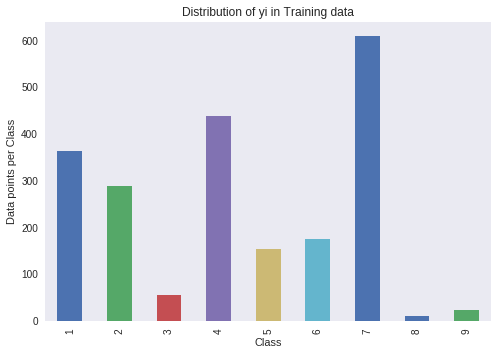

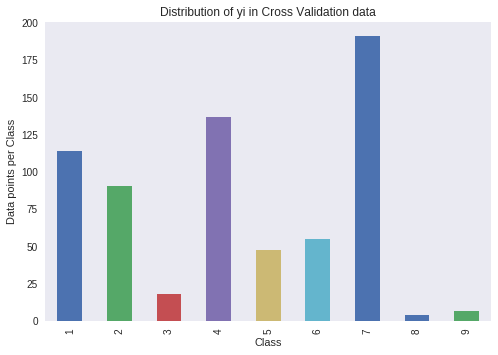

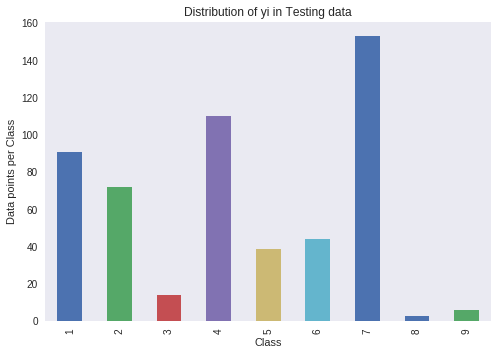

In [0]:
def print_distribution( VAL, name):
  VAL.plot(kind='bar')
  plt.xlabel('Class')
  plt.ylabel('Data points per Class')
  plt.title('Distribution of yi in '+name+' data')
  plt.grid()
  plt.show()
  
print_distribution( train_class_dist, 'Training' )
print_distribution( cv_class_dist, 'Cross Validation'  )
print_distribution( test_class_dist, 'Testing' )

#One hot encoding of the featurres( Gene,Variation,Text) of different data sets

In [0]:
G_V = CountVectorizer()
train_gene_onehotCoding = G_V.fit_transform(x_train['Gene'])
test_gene_onehotCoding  = G_V.transform(x_test['Gene'])
cv_gene_onehotCoding    = G_V.transform(x_cv['Gene'])

In [0]:
print(train_gene_onehotCoding.shape)
print(test_gene_onehotCoding.shape)
print(cv_gene_onehotCoding.shape)

(2124, 232)
(665, 232)
(532, 232)


In [0]:
V_V = CountVectorizer()
train_variation_onehotCoding = V_V.fit_transform(x_train['Variation'])
test_variation_onehotCoding  = V_V.transform(x_test['Variation'])
cv_variation_onehotCoding    = V_V.transform(x_cv['Variation'])

In [0]:
T_V = CountVectorizer()
train_text_onehotCoding = T_V.fit_transform(x_train['TEXT'])
train_text_onehotCoding = normalize(train_text_onehotCoding, axis=0)

test_text_onehotCoding = T_V.transform(x_test['TEXT'])
test_text_onehotCoding = normalize(test_text_onehotCoding, axis=0)

cv_text_onehotCoding = T_V.transform(x_cv['TEXT'])
cv_text_onehotCoding = normalize(cv_text_onehotCoding, axis=0)


In [0]:
print(train_text_onehotCoding.shape)
print(test_text_onehotCoding.shape)
print(cv_text_onehotCoding.shape)

(2124, 125465)
(665, 125465)
(532, 125465)


In [0]:
# combining Featuers GENE VARAITION and TEXT

train_gene_var_onehotCoding = hstack((train_gene_onehotCoding,train_variation_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_onehotCoding,test_variation_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_onehotCoding,cv_variation_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_onehotCoding)).tocsr()
train_y = np.array(list(x_train['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_onehotCoding)).tocsr()
test_y = np.array(list(x_test['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_onehotCoding)).tocsr()
cv_y = np.array(list(x_cv['Class']))

In [0]:
print(train_x_onehotCoding.shape)
print(cv_x_onehotCoding.shape)
print(test_x_onehotCoding.shape)

(2124, 127657)
(532, 127657)
(665, 127657)


##Applying Machine Learning Model( Classifiers) on the Data to predict labels

In [0]:
def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we will provide the array of probabilities belongs to each class
    print("Test Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    print(confusion_matrix(test_y, pred_y))
    print("Score :",sig_clf.score(test_x, test_y))
    
    print("Train Log loss :",log_loss(train_y, sig_clf.predict_proba(train_x_onehotCoding)))
    print("CV loss :",log_loss(cv_y, sig_clf.predict_proba(cv_x_onehotCoding)))
    
    
    print("Actual :", test_y[0])
    print("Probability :",np.round(sig_clf.predict_proba(test_x[0]),4))
    print("Predicted :", sig_clf.predict(test_x[0]))
    # calculating the number of data points that are misclassified
    # print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0], 1-np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    
    

##Logistic Regression SGDClassifier 

In [0]:
clf = SGDClassifier(class_weight='balanced', alpha=0.001, penalty='l2', loss='log', random_state=32 ,max_iter=1000, tol=0.0001)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, test_x_onehotCoding, test_y, clf)

Test Log loss : 1.1309001736390696
[[ 62   1   3  23   9   4  11   1   0]
 [  3  36   0   1   1   1  49   0   0]
 [  2   0   2   7   0   0   7   0   0]
 [ 19   0   1  97   5   1  11   2   1]
 [  9   1   2   7  21   1   7   0   0]
 [  7   5   0   4   6  23  10   0   0]
 [  0  14   0   1   5   1 169   1   0]
 [  0   2   0   0   0   0   2   0   0]
 [  1   0   0   0   0   0   2   0   4]]
Score : 0.6225563909774436
Train Log loss : 0.638062593866239
CV loss : 1.0950819534818401
Actual : 5
Probability : [[0.061  0.0404 0.0508 0.1754 0.5514 0.0839 0.0232 0.0079 0.0061]]
Predicted : [5]


##Naive Bayes

In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, test_x_onehotCoding, test_y, clf)

Test Log loss : 1.3373565893711143
[[ 53   1   0  27   1   6  26   0   0]
 [  3  23   0   2   0   0  63   0   0]
 [  0   0   1   5   0   2  10   0   0]
 [ 21   1   0  94   3   2  16   0   0]
 [ 11   0   0  10  15   1  11   0   0]
 [  4   4   0   7   2  28  10   0   0]
 [  0   8   0   1   3   1 178   0   0]
 [  1   0   0   1   0   0   2   0   0]
 [  0   0   0   0   0   0   2   0   5]]
Score : 0.5969924812030075
Train Log loss : 0.9709757614748049
CV loss : 1.3301023783534078
Actual : 5
Probability : [[0.1321 0.1266 0.0342 0.1129 0.4108 0.0492 0.1208 0.0082 0.0052]]
Predicted : [5]


##Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, test_x_onehotCoding, test_y, clf)

Test Log loss : 1.3439806511882268
[[ 57   3   0  33   1   3  17   0   0]
 [  4  29   0   6   0   0  52   0   0]
 [  0   0   0   7   0   0  11   0   0]
 [ 23   1   0 101   0   1  11   0   0]
 [ 10   2   0  24   1   1  10   0   0]
 [  9   7   0   3  12  12  12   0   0]
 [  2  10   0   4   0   0 175   0   0]
 [  1   0   0   1   0   0   2   0   0]
 [  1   0   0   1   0   0   4   0   1]]
Score : 0.5654135338345865
Train Log loss : 0.628238850284262
CV loss : 1.3364707372360793
Actual : 5
Probability : [[0.1436 0.0767 0.0459 0.2898 0.2213 0.1271 0.0794 0.008  0.0082]]
Predicted : [4]


##AdaBoost Classifier

In [0]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

Log loss : 1.7432862058505991
Number of mis-classified points : 0.6221804511278195


Very bad accuracy because data is not suitable for the classifers 

##SVM

In [0]:
from sklearn.svm import SVC
clf =  SVC(kernel="linear", C=1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, test_x_onehotCoding, test_y, clf)

Test Log loss : 1.0954353202071974
[[ 59   2   0  34   6   2  11   0   0]
 [  5  45   0   1   0   1  39   0   0]
 [  0   0   1   9   0   0   8   0   0]
 [ 11   1   1 111   3   1   9   0   0]
 [ 12   1   1   9  14   2   8   0   1]
 [  4   5   0   4   1  31  10   0   0]
 [  1  18   0   4   4   1 161   0   2]
 [  0   1   0   1   0   0   2   0   0]
 [  0   0   0   0   0   0   2   0   5]]
Score : 0.6421052631578947
Train Log loss : 0.7192675642326717
CV loss : 1.0394969723930823
Actual : 5
Probability : [[3.580e-02 2.700e-03 6.330e-02 1.457e-01 3.280e-01 2.545e-01 2.000e-04
  1.658e-01 4.100e-03]]
Predicted : [5]



#Working on other Encoding Incomplete

In [0]:
def evaluate_features(X, y, clf=None):
    if clf is None:
        clf = LogisticRegression()
    
    probas = cross_val_predict(clf, X, y, cv=StratifiedKFold(random_state=8), 
                              n_jobs=-1, method='predict_proba', verbose=2)
    pred_indices = np.argmax(probas, axis=1)
    classes = np.unique(y)
    preds = classes[pred_indices]
    print('Log loss: {}'.format(log_loss(y, probas)))
    print('Accuracy: {}'.format(accuracy_score(y, preds)))
    print("Number of mis-classified points :", np.count_nonzero((preds- y))/y.shape[0])
    print(confusion_matrix(y, preds))

In [0]:
svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
truncated_bag_of_words = svd.fit_transform(train_x_onehotCoding)

In [0]:
evaluate_features(truncated_bag_of_words, train_y)

Log loss: 1.4344208845031459
Accuracy: 0.4651600753295669
Number of mis-classified points : 0.5348399246704332
[[114   0   0  77   5   8 159   0   0]
 [ 15   2   0   2   0   0 270   0   0]
 [  4   0   0   6   6   0  41   0   0]
 [ 67   0   0 186  17   2 167   0   0]
 [  7   0   0  51  28   9  60   0   0]
 [ 15   0   0  44   6  52  59   0   0]
 [  6   8   0   4   0   0 591   0   0]
 [  2   0   0   0   0   0   7   3   0]
 [  3   0   0   0   0   0   9   0  12]]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished


In [0]:
count_vectorizer = TfidfVectorizer()    
train_tfidf = count_vectorizer.fit_transform(x_train['TEXT'])
train_tfidf = normalize(train_tfidf, axis=0)

test_tfidf = count_vectorizer.fit_transform(x_test['TEXT'])
test_tfidf = normalize(test_tfidf, axis=0)

cv_tfidf = count_vectorizer.fit_transform(x_cv['TEXT'])
cv_tfidf = normalize(cv_tfidf, axis=0)

In [0]:
train_x_tfidf = hstack((train_gene_var_onehotCoding, train_tfidf)).tocsr()
test_x_tfidf = hstack((test_gene_var_onehotCoding, test_tfidf)).tocsr()
cv_x_tfidf = hstack((cv_gene_var_onehotCoding, cv_tfidf)).tocsr()

In [0]:
print(train_x_tfidf.shape)
print(cv_x_tfidf.shape)

(2124, 127921)
(532, 70385)


In [0]:
count_vectorizer = TfidfVectorizer()
tfidf = count_vectorizer.fit_transform(result['TEXT'])

In [0]:
svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
truncated_tfidf = svd.fit_transform(tfidf)

In [0]:
evaluate_features(truncated_tfidf, result['Class'].values.ravel())

Log loss: 1.7543998955064897
Accuracy: 0.34628124059018367
Number of mis-classified points : 0.6537187594098163
[[181   5  19  90  75  15 183   0   0]
 [ 20  84   0  21   8   0 319   0   0]
 [ 12  14   0   4  10   7  42   0   0]
 [200   2  15 100  47  18 304   0   0]
 [ 38   6   0  36  67  19  76   0   0]
 [ 44   6   0  56   6  85  78   0   0]
 [ 20 193   0  81  26   0 633   0   0]
 [  1   0   0   5   0   0  13   0   0]
 [  5   0   0   6   0   0  26   0   0]]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished
